In [41]:
#pip install fbprophet

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
#from prophet import Prophet

In [45]:
# read csv
# By using encoding="ISO-8859-1" we can read special characters in the dataset properly

df = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")

# 
df.columns = df.columns.str.strip()

#show first five line
print(df.head())

#datatype 
print(df.info())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

Let's Cleanse and Transform Data

In [48]:
# Convert date column to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Convert date column to datetime format
df.dropna(subset=["InvoiceDate"], inplace=True)

# Günlük toplam satış miktarını hesapla
df_grouped = df.groupby("InvoiceDate", as_index=False)["Quantity"].sum()



# Let's calculate the total daily sales amount by grouping
df_grouped.set_index("InvoiceDate", inplace=True)

#daily data frekans
df_grouped = df_grouped.asfreq('D', method='ffill')

# Seasonal decomposition process
decomposition = seasonal_decompose(df_grouped["Quantity"], model="additive", period=30)



# Let's check the new date format and data types
print(df_grouped.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374 entries, 2010-12-01 08:26:00 to 2011-12-09 08:26:00
Freq: D
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Quantity  374 non-null    int64
dtypes: int64(1)
memory usage: 5.8 KB
None


Let's Visualize Time Series

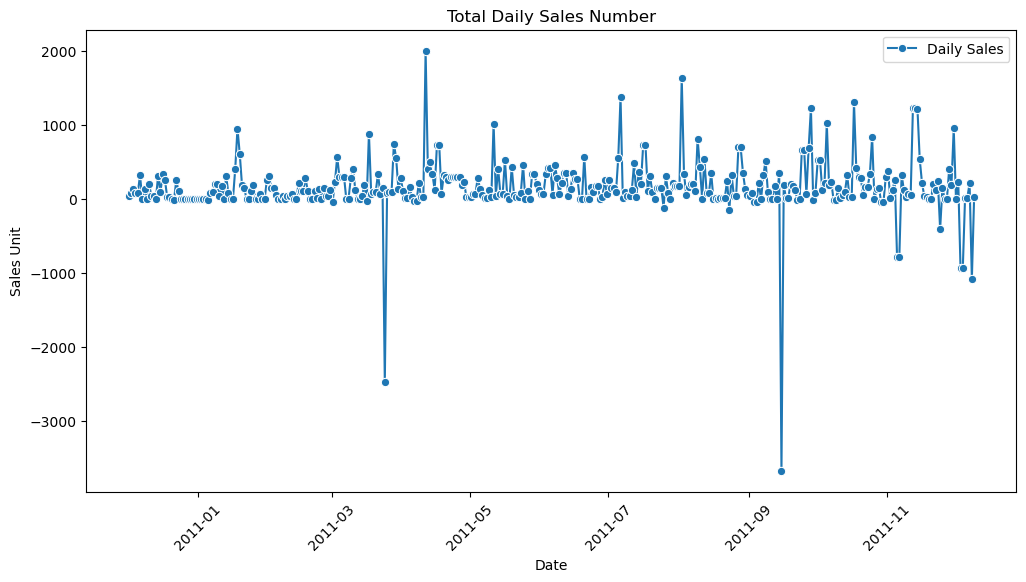

In [51]:
plt.figure(figsize=(12,6))
sns.lineplot(x="InvoiceDate", y="Quantity", data=df_grouped, marker="o", label="Daily Sales")
plt.title("Total Daily Sales Number")
plt.xlabel("Date")
plt.ylabel("Sales Unit")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Seasonality and Trend Analysis

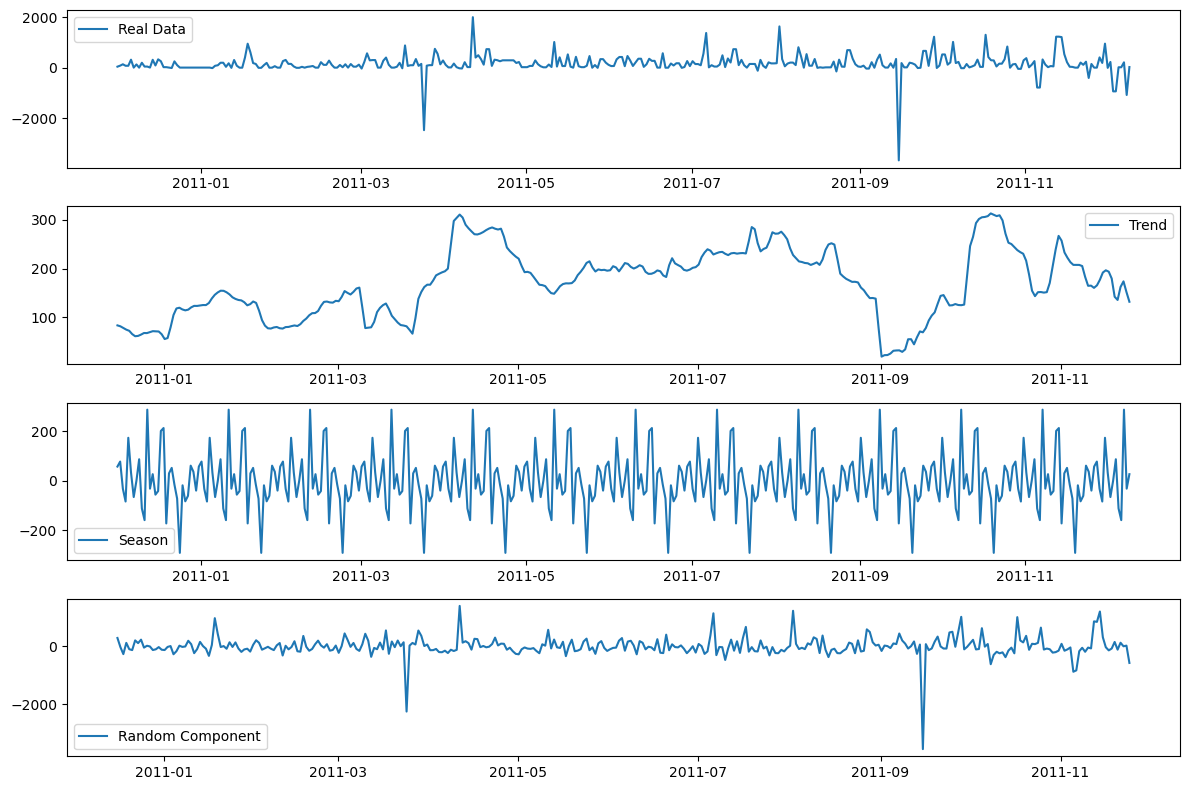

In [54]:

df_grouped.columns = df_grouped.columns.str.strip().str.lower()
df_grouped.index = pd.to_datetime(df_grouped.index)

# Seasonal separation
decomposition = seasonal_decompose(df_grouped["quantity"], model="additive", period=30)

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label="Real Data")
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label="Trend")
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label="Season")
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label="Random Component")
plt.legend()

plt.tight_layout()
plt.show()

In [56]:
model = ARIMA(df_grouped["quantity"], order=(5,1,0)) # (p,d,q) parametres
model_fit = model.fit()

# for 30 day 
forecast = model_fit.forecast(steps=30)

#Let's show the results
print("Guest to sales for 30 day:")
print(forecast)

Guest to sales for 30 day:
2011-12-10 08:26:00   -299.858686
2011-12-11 08:26:00   -222.562778
2011-12-12 08:26:00   -177.777894
2011-12-13 08:26:00   -259.475889
2011-12-14 08:26:00   -320.736850
2011-12-15 08:26:00   -225.275297
2011-12-16 08:26:00   -255.105051
2011-12-17 08:26:00   -244.145949
2011-12-18 08:26:00   -242.550402
2011-12-19 08:26:00   -256.883230
2011-12-20 08:26:00   -256.816287
2011-12-21 08:26:00   -248.689383
2011-12-22 08:26:00   -251.254872
2011-12-23 08:26:00   -249.838565
2011-12-24 08:26:00   -250.484872
2011-12-25 08:26:00   -252.156412
2011-12-26 08:26:00   -251.585301
2011-12-27 08:26:00   -250.903683
2011-12-28 08:26:00   -251.089721
2011-12-29 08:26:00   -250.955474
2011-12-30 08:26:00   -251.130800
2011-12-31 08:26:00   -251.285144
2012-01-01 08:26:00   -251.177112
2012-01-02 08:26:00   -251.119006
2012-01-03 08:26:00   -251.129178
2012-01-04 08:26:00   -251.123199
2012-01-05 08:26:00   -251.152586
2012-01-06 08:26:00   -251.163216
2012-01-07 08:26:00  

Alternative Estimation with Prophet Model